In [25]:
import sympy as sp
from IPython.display import display, Math, Latex, display_latex

x0, x1, x2 = sp.symbols('x_0  x_1 x_2')
y0, y1, y2 = sp.symbols('y_0  y_1 y_2')
dx = sp.symbols('\Delta_x')

A = sp.Matrix([[x0**2, x0, 1],
               [x1**2, x1, 1],
               [x2**2, x2, 1]])

b = sp.Matrix([y0, y1, y2])

display(Math(sp.latex(A)))

coeffs = A.LUsolve(b)
coeffs = coeffs.subs([(x1, x0+dx), (x2, x0+2*dx)])
coeffs = sp.simplify(coeffs)

display(Math(sp.latex(coeffs)))

x = sp.symbols('x')
dy_dx = 2*coeffs[0]*x + coeffs[1]
dy_dx = sp.simplify(dy_dx)

display(Math(sp.latex(dy_dx)))

dy_dx_x0mdx = dy_dx.subs(x, x0-dx/2)
dy_dx_x0mdx = sp.simplify(dy_dx_x0mdx)

print(" at x_0 - dx/2 : ")
display(Math(sp.latex(dy_dx_x0mdx)))

dy_dx_x2pdx = dy_dx.subs(x, x0+2*dx+dx/2)
dy_dx_x2pdx = sp.simplify(dy_dx_x2pdx)

print(" at x_2 + dx/2 : ")
display(Math(sp.latex(dy_dx_x2pdx)))

dy_dx_x0pdx = dy_dx.subs(x, x0+dx/2)
dy_dx_x0pdx = sp.simplify(dy_dx_x0pdx)

print(" at x_0 + dx/2 : ")
display(Math(sp.latex(dy_dx_x0pdx)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 at x_0 - dx/2 : 


<IPython.core.display.Math object>

 at x_2 + dx/2 : 


<IPython.core.display.Math object>

 at x_0 + dx/2 : 


<IPython.core.display.Math object>

In [1]:
%pwd

'/home/nima/Documents/GitProjects/myPyCodes'

In [64]:
from sympy import I, exp, symbols, lambdify, diff, Matrix, latex
from IPython.display import display, Math, Latex, display_latex
import mpmath, cmath
import numpy as np

x, y, z = symbols('x y z')

A = np.ndarray((4,4), dtype=object)

A[:,:] = [[0, x, y, z],
          [z, 0, x, y],
          [y, z, 0, x],
          [x, y, z, 0]]

B = Matrix([[x, y, z],
           [z, x, y]])


display(Math(latex(B)))

display(Latex(r"$A\vphantom0^i\vphantom1_j\vphantom1^k$"))

print(latex(B))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

\left[\begin{matrix}x & y & z\\z & x & y\end{matrix}\right]


In [23]:
from sympy import I, exp, symbols, lambdify
import mpmath, cmath
import numpy as np

x = symbols('x')

f_sym = x**2 + I*exp(I*x)

print(complex(f_sym.evalf(subs={x:1.0})))

f = lambdify(x, f_sym.subs(I, 1j), modules=[{"I":1j}, "numpy"])
f(1.0j)


(0.1585290151921035+0.5403023058681398j)


(-1+0.36787944117144233j)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


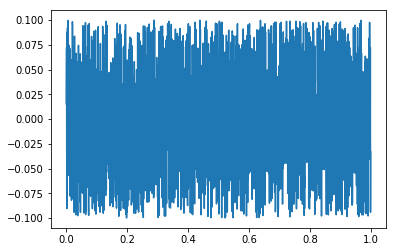

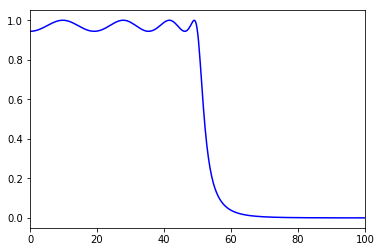

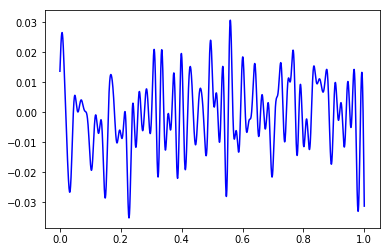

In [77]:
%pylab inline

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

N = 2001
t0, t1 = 0.0, 1.0
t = np.linspace(t0, t1, N)
dt = t1/N
xlow = np.sin(2 * np.pi * 15 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = 0*xlow + 0*xhigh + 0.2*(np.random.rand(N)-0.5)

plot(t, x)
show()

f = 50.0
f_lp = f*dt/np.pi
#b, a = signal.butter(8, f_lp)
b, a = signal.cheby1(8, rp=0.5, Wn=f_lp*2.0*np.pi, btype='low', analog=False, output='ba')

w, h = signal.freqz(b, a, worN=2**12)

plt.plot(w/(2*np.pi)/dt, np.abs(h), 'b')
xlim(0, 100)
show()

y = signal.filtfilt(b, a, x, padlen=150)
np.abs(y - xlow).max()

plot(t, y, 'b')
#plot(t, xlow, 'r')
show()


In [6]:
import numpy as np

m = 4
binom_m = 1.0
for i in range(m+1):
    print(binom_m)
    binom_m *= (m-i)
    binom_m /= i+1


1.0
4.0
6.0
4.0
1.0


Populating the interactive namespace from numpy and matplotlib
(256, 256)
(-2.2954e-71-1.3715e-71j)


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


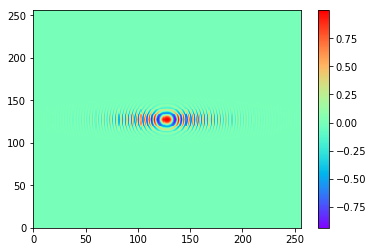

In [20]:
%pylab inline
import numpy as np


"""f = open('other/Ex0.csv', 'r')
f_str = f.read()
f.close()
f = open('other/Ex0.csv', 'w')
f_str = f_str.replace('i', 'j')
f.write(f_str)
f.close()
"""

Ex0 = np.genfromtxt('other/Ex0.csv', delimiter=',', dtype=complex)

print(Ex0.shape)
print(Ex0[0,0])

pcolormesh(np.real(Ex0),cmap="rainbow")
colorbar()

Populating the interactive namespace from numpy and matplotlib


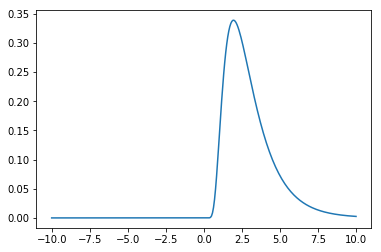

In [17]:
%pylab inline
import numpy as np

w_0 = 0.0
def mod_inv_gauss(u, lam=10.1, mu=3.0): 
    u = (u>0)*u + (u<=0)*1.0e-5
    return np.sqrt(lam/(2.0*np.pi*u**3))*np.exp((-lam*(u-mu)**2)/(2*mu**2*u))*np.cos(w_0*u)

u = np.linspace(-10, 10, 300)

plot(u, mod_inv_gauss(u))



In [5]:
from sympy import *
from IPython.display import display, Math, Latex

x, t, a, b, dt, dz = symbols('x t a b dt dz')

expr = 1/dt*exp(I*a*x) + 1/dt*exp(-I*a*x) + 1/dz*exp(I*b*t) + 1/dz*exp(-I*b*t)

display(Math(latex(expr)))

expr = expr.simplify()
display(Math(latex(expr)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

x, t = symbols('x t')

f_str = 'Heaviside(t)'
A = parse_expr(f_str)

print(A)

B = lambdify(t, A)
print(B(1.0), B(-1.0), B(0.0))

Heaviside(t)
1 0 Heaviside(0.0)


In [16]:
import numpy as np

r_s = 695700*10**3
r_es = 149.6*10**9
r_e = 6371*10**3


A_s = 4.0*np.pi*r_s**2 ##sun's surface area
A_e = 4.0*np.pi*r_e**2 ##earth's surface area


P_se = 2*10**7

P_e_rec = P_se*A_s*(4*np.pi)/(4*np.pi*r_es**2)

print('P_e_rec = ', P_e_rec)

P_se = 20
P_e_rad = P_se*(4*np.pi)

print('P_e_rad = ', P_e_rad)

print('P_e_rad/P_e_rec = ', P_e_rad/P_e_rec)



P_e_rec =  5435.2644504151995
P_e_rad =  251.32741228718345
P_e_rad/P_e_rec =  0.0462401442616071


In [12]:
import numpy as np

r_s = 695700*10**3
r_es = 149.6*10**9
r_e = 6371*10**3


A_s = 4.0*np.pi*r_s**2 ##sun's surface area
A_e = 4.0*np.pi*r_e**2 ##earth's surface area

T_s = 5800 ##K sun's temparature

sigma = 5.67*10**-8

P_sun = sigma*A_s*T_s**4


P_sun_on_earth = P_sun/(4.0*np.pi*r_es**2)

print('P_sun_on_earth : ', P_sun_on_earth)

T_o = 300
A_o = 1

P_o = sigma*A_o*T_o**4

print('P_o : ', P_o)



P_sun_on_earth :  1387.636940684794
P_o :  459.27


In [3]:
import numpy as np

a = np.arccos(31/34)*180/np.pi

print(a)

b = np.arcsin(13/34)*180/np.pi

print(b)


24.2496286025
22.4795056094


Populating the interactive namespace from numpy and matplotlib


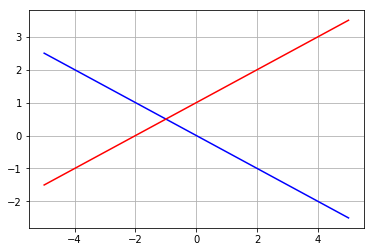

In [10]:
%pylab inline
import numpy as np

a = b = 1.0/2

N = 100
X = np.linspace(-5, 5, N)

def getTR(X):
    A = np.array([[1-a*X, -1-b*X],
                  [1, 1]])
    #print(A)
    rhs = np.array([1+b*X, 1])
    TR = np.linalg.inv(A).dot(rhs.T)
    TR = TR.T
    #print(TR)
    return TR[0], TR[1]

R = np.zeros(N)
T = np.zeros(N)

for i in range(N):
    T[i], R[i] = getTR(X[i])

    
plot(X, R, 'b')
plot(X, T, 'r')
grid()
show()


In [8]:
from sympy import symbols, lambdify
from sympy.parsing.sympy_parser import parse_expr
a = parse_expr("1.5*sin(2*pi*alpha*t)")

t, alpha = symbols("t alpha")

a = a.replace(alpha, 1)

print(a)

a_func = lambdify(t, a, modules="numpy")

a_func(1)


1.5*sin(2*pi*t)


-3.6739403974420594e-16

Populating the interactive namespace from numpy and matplotlib


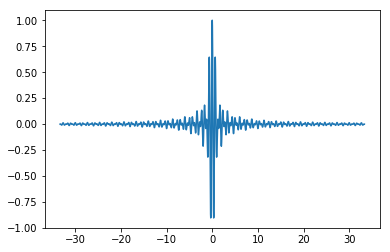

67


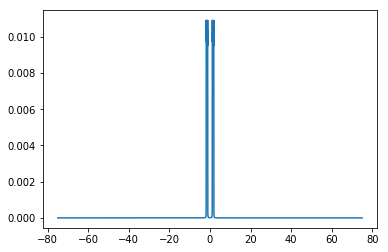

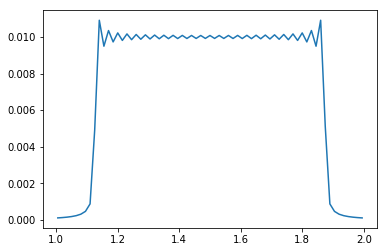

67


In [4]:
%pylab inline
import numpy as np

from Electromagnetics.Misc import Fourier1D, InvFourier1D

f_0 = 1
f_0_g = 1.5
T_g = 1.0/f_0_g

t = np.linspace(-50, 50, 10000)*T_g
E_pulse = np.cos(2.0*np.pi*f_0_g*t)*np.sinc(t/(2*T_g))
plot(t, E_pulse)
show()

t_F, E_pulse_F = Fourier1D(t, E_pulse)

t_F_mask = np.logical_and(t_F>1.0*f_0, t_F<2.0*f_0)
print(np.sum(t_F_mask))

plot(t_F, np.abs(E_pulse_F))
show()

t_F, E_pulse_F = t_F[t_F_mask], E_pulse_F[t_F_mask]
plot(t_F, np.abs(E_pulse_F))
show()
print(len(t_F))




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


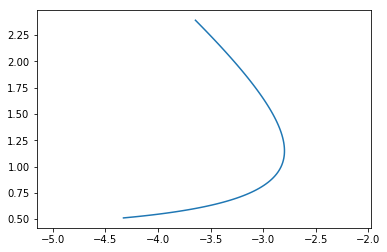

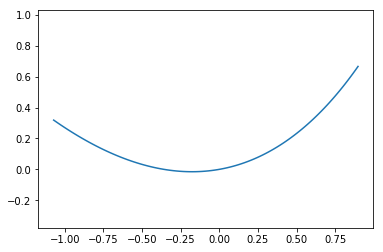

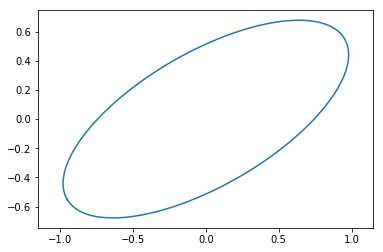

In [3]:
%pylab inline
import numpy as np

def rotMatrix(theta):
    A = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return A

def Hyperbola(a, c, x0, x1, N=100, rot=0.0):
    b = np.sqrt(c**2 - a**2)
    x = np.linspace(x0, x1, N, endpoint=True)
    y = b**2*np.sqrt(1 + x**2/a**2)
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp

def Parabola(f, x0, x1, N=100, rot=0.0):
    x = np.linspace(x0, x1, N, endpoint=True)
    y = x**2/(4.0*f)
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp

def Ellipse(a, c, x0, x1, N=100, rot=0.0, branch='+'):
    assert branch in ['+', '-', '+-']
    assert a>=c
    b = np.sqrt(a**2 - c**2)
    if x0<-a:
        x0 = -a
    if x1>a:
        x1 = a
    x = np.linspace(x0, x1, N, endpoint=True)
    y = (b/a)*np.sqrt(a**2 - x**2)
    if branch=='-':
        y *= -1
    elif branch=='+-':
        y2 = -y
        x = np.concatenate((x, np.flip(x, 0)))
        y = np.concatenate((y, np.flip(y2, 0)))
    x = x[np.logical_not(np.isnan(y))]
    y = y[np.logical_not(np.isnan(y))]
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp



a, c = 1.0, 2.0
x, y = Hyperbola(a, c, x0=-1, x1=1, N=100, rot=70/180*np.pi)
plot(x, y)
axis('equal')
show()

f = 0.5
x, y = Parabola(f, x0=-1, x1=1, N=100, rot=10/180*np.pi)
plot(x, y)
axis('equal')
show()

a, c = 1.1, 1.0
x, y = Ellipse(a, c, x0=-5, x1=5, N=1000, rot=30/180*np.pi, branch='+-')
plot(x, y)
axis('equal')
show()


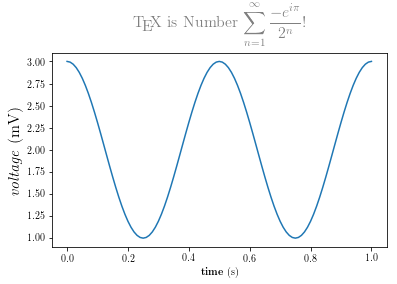

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

#plt.savefig('tex_demo')
plt.show()

Populating the interactive namespace from numpy and matplotlib


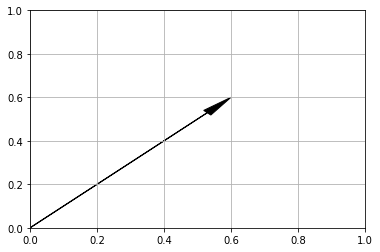

In [18]:
%pylab inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.arrow(0, 0, 0.6, 0.6, head_width=0.03, head_length=0.1, fc='k', ec='k', length_includes_head=True)
grid()
plt.show()


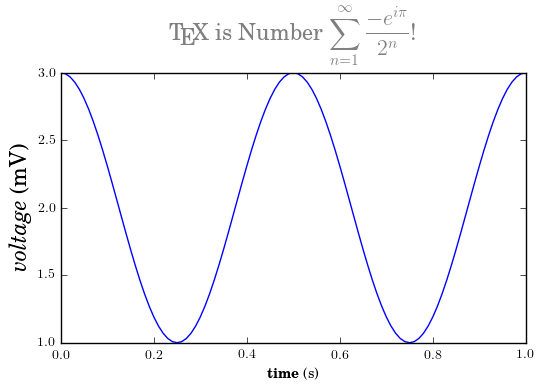

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.show()

In [8]:
import pandas as pd
import datetime

date_start = datetime.date.today() - datetime.timedelta(days=5)

dt_list = pd.bdate_range(start=date_start, end=datetime.date.today())

print(dt_list)
                   
sorted(dt_list.date.tolist())

DatetimeIndex(['2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01'], dtype='datetime64[ns]', freq='B')


[datetime.date(2017, 2, 24),
 datetime.date(2017, 2, 27),
 datetime.date(2017, 2, 28),
 datetime.date(2017, 3, 1)]

In [32]:
import pandas as pd
import numpy as np

a = pd.Timedelta('1 m')
a_np =  np.timedelta64(20, 's').astype('timedelta64[ms]')
print(a)
print(a_np)

b = a.to_pytimedelta()
b_np = a_np.item().total_seconds()

print(b, b.seconds)
print(b_np)

0 days 00:01:00
20000 milliseconds
0:01:00 60
20.0


Populating the interactive namespace from numpy and matplotlib


<Container object of 50 artists>

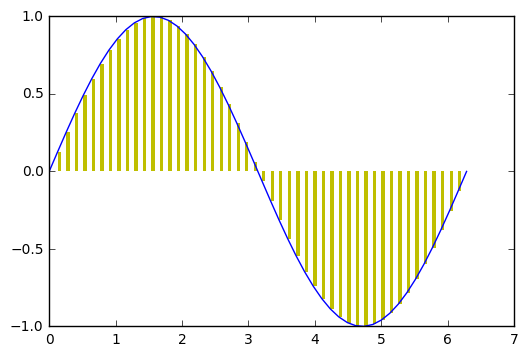

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

N = 50
x = np.linspace(0, 2.0*pi, N)
y = np.sin(x)

plot(x, y)
bar(x, y, 0.05, color='y',linewidth=0)


In [23]:
import numpy as np
import pandas as pd

N = 3
df = pd.DataFrame(np.zeros(shape=(N,2)),columns=["a","b"])

df.loc[0:10, 'a'] = np.arange(0, N)
df.loc[0:10, 'b'] = 2*np.arange(N-1, -1, -1)
df = df.set_index('a')

df.loc[11.0] = [2.33]

print(df)

df.to_hdf('other/testdf', 'df', format='table', mode='a', append=True)


         b
a         
0.0   4.00
1.0   2.00
2.0   0.00
11.0  2.33


In [29]:
df2 = pd.read_hdf('other/testdf', 'df')

print(df2)

df3 = df2.reset_index().drop_duplicates(subset='a', keep='first').set_index('a')

print(df3)


          b
a          
0.0   18.00
1.0   16.00
2.0   14.00
3.0   12.00
4.0   10.00
5.0    8.00
6.0    6.00
7.0    4.00
8.0    2.00
9.0    0.00
11.0   2.33
0.0    4.00
1.0    2.00
2.0    0.00
11.0   2.33
          b
a          
0.0   18.00
1.0   16.00
2.0   14.00
3.0   12.00
4.0   10.00
5.0    8.00
6.0    6.00
7.0    4.00
8.0    2.00
9.0    0.00
11.0   2.33


In [12]:
import numpy as np
import datetime

dt1 = datetime.datetime.today()
print(dt1.date())

dt1 = np.datetime64(dt1)
print(dt1)

print(dt1.astype('M8[ms]').astype('O'))
print(datetime.datetime.fromtimestamp(dt1.astype('M8[ns]').astype('O')/1e9))



2017-01-06
2017-01-06T10:14:10.735389
2017-01-06 10:14:10.735000
2017-01-06 05:14:10.735389


In [15]:
import pandas as pd
import datetime

t = pd.tslib.Timestamp('2016-03-03 00:00:00')
print(type(t))
t = t.to_pydatetime()
t2 = datetime.datetime.today()
print(type(t2))

(t2-t).days

<class 'pandas.tslib.Timestamp'>
<class 'datetime.datetime'>


40517

In [7]:
import numpy as np
import pandas as pd

N = 5
df = pd.DataFrame(np.zeros(shape=(N,2)),columns=["a","b"])

df.loc[0:10, 'a'] = np.arange(0, N)
df.loc[0:10, 'b'] = 2*np.arange(N-1, -1, -1)

#df.loc[2] = df.loc[0]

print(df)
print(df['b'].values)

df2 = df.set_index('a')
df2.loc[1.2] = 3.0
df2.sort_values('b', ascending=True,  inplace=True)

print(df2)
print(df2.index)
for i in range(len(df2)):
    print(df2.iloc[i]['b'], end=' ')
print('\n', '-'*20)
print(df2['b'].values)

df2.sort_index(ascending=True,  inplace=True)
print(df2)
print(df2.index)
for i in range(len(df2)):
    print(df2.iloc[i]['b'], end=' ')
print('\n', '-'*20)
print(df2['b'].values)
print(df2.index.values)

     a    b
0  0.0  8.0
1  1.0  6.0
2  2.0  4.0
3  3.0  2.0
4  4.0  0.0
[ 8.  6.  4.  2.  0.]
       b
a       
4.0  0.0
3.0  2.0
1.2  3.0
2.0  4.0
1.0  6.0
0.0  8.0
Float64Index([4.0, 3.0, 1.2, 2.0, 1.0, 0.0], dtype='float64', name='a')
0.0 2.0 3.0 4.0 6.0 8.0 
 --------------------
[ 0.  2.  3.  4.  6.  8.]
       b
a       
0.0  8.0
1.0  6.0
1.2  3.0
2.0  4.0
3.0  2.0
4.0  0.0
Float64Index([0.0, 1.0, 1.2, 2.0, 3.0, 4.0], dtype='float64', name='a')
8.0 6.0 3.0 4.0 2.0 0.0 
 --------------------
[ 8.  6.  3.  4.  2.  0.]
[ 0.   1.   1.2  2.   3.   4. ]


In [2]:
import datetime

a = datetime.datetime(2017, 1, 12, 9, 30)

print(a)

2017-01-12 09:30:00


In [21]:
'hi there bbj bbj'.replace('bbj', 'xx', 1)


'hi there xx bbj'

In [5]:
import subprocess
p = subprocess.Popen(['wmctrl', '-l'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out, err = p.communicate()
print(out.decode('utf-8'))


p = subprocess.Popen(['wmctrl', '-a Chromium'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out, err = p.communicate()
print(out.decode('utf-8'))



0x02e00002  0 nima-desktop XdndCollectionWindowImp
0x02e00005  0 nima-desktop unity-launcher
0x02e00008  0 nima-desktop unity-panel
0x02e0000b  0 nima-desktop unity-dash
0x02e0000c  0 nima-desktop Hud
0x0260000a  0 nima-desktop Bureau
0x02600221  0 nima-desktop Transformation Electromagnetics
0x03c0000a  0 nima-desktop nima@nima-desktop: ~
0x03a00023  0 nima-desktop test page - Mozilla Firefox
0x04000002  0 nima-desktop Running shell command from Python and capturing the output - Stack Overflow – Chromium
0x04c00008  0 nima-desktop Electromagnetic Waves in Gravitational Fields.pdf — Electromagnetic Waves in Gravitational Fields
0x03600008  0 nima-desktop Gestionnaire de mises à jour
0x03c00836  0 nima-desktop nima@nima-desktop: ~




In [9]:
import datetime

datetime.datetime.fromtimestamp(1481143020)

datetime.datetime(2016, 12, 7, 15, 37)

In [1]:
import gtk
gtk.gtk_init()

import gi
gi.require_version('Wnck', '3.0')
from gi.repository import Wnck

screen = Wnck.Screen.get_default()
print(screen)

windows = screen.get_windows()
print(windows)

for w in windows:
    print(w.get_name())


ImportError: No module named 'gtk'

In [14]:
#import pygtk
#pygtk.require('2.0')
import gtk
#import wnck
import re
import sys
import time
from gi.repository import Wnck as wnck

screen = wnck.Screen.get_default()
while gtk.events_pending():
    gtk.main_iteration()

titlePattern = re.compile('.*Geany.*')

windows = screen.get_windows()
for w in windows:
    print(w.get_name())
    if titlePattern.match(w.get_name()):
        print(w.get_name())
        w.activate(int(time.time()))

AttributeError: When using gi.repository you must not import static modules like "gobject". Please change all occurrences of "import gobject" to "from gi.repository import GObject". See: https://bugzilla.gnome.org/show_bug.cgi?id=709183

In [29]:
import pandas as pd
from io import StringIO

data = """1481142900,9.589,9.5996,9.58,9.585,161038
1,9.575,9.585,9.57,9.585,63029
2,9.585,9.59,9.57,9.575,76203
3,9.575,9.59,9.57,9.58,107084
4,9.585,9.59,9.57,9.575,94446
5,9.5893,9.595,9.58,9.5865,133360
6,9.58,9.59,9.58,9.585,41699
7,9.595,9.595,9.57,9.58,191863
8,9.585,9.6,9.58,9.59,104358
9,9.59,9.59,9.58,9.5801,92532"""
data = 'DATE,CLOSE,HIGH,LOW,OPEN,VOLUME\n'+data

df = pd.read_csv(StringIO(data), sep=',')
date_0 = df.loc[0, 'DATE']

for i in range(len(df)):
    df.loc[i, 'DATE'] = datetime.datetime.fromtimestamp(date_0 + i*60)

print(df)
print(df.loc[len(df)-1, 'DATE'])


                  DATE   CLOSE    HIGH   LOW    OPEN  VOLUME
0  2016-12-07 15:35:00  9.5890  9.5996  9.58  9.5850  161038
1  2016-12-07 15:36:00  9.5750  9.5850  9.57  9.5850   63029
2  2016-12-07 15:37:00  9.5850  9.5900  9.57  9.5750   76203
3  2016-12-07 15:38:00  9.5750  9.5900  9.57  9.5800  107084
4  2016-12-07 15:39:00  9.5850  9.5900  9.57  9.5750   94446
5  2016-12-07 15:40:00  9.5893  9.5950  9.58  9.5865  133360
6  2016-12-07 15:41:00  9.5800  9.5900  9.58  9.5850   41699
7  2016-12-07 15:42:00  9.5950  9.5950  9.57  9.5800  191863
8  2016-12-07 15:43:00  9.5850  9.6000  9.58  9.5900  104358
9  2016-12-07 15:44:00  9.5900  9.5900  9.58  9.5801   92532
2016-12-07 15:44:00
